<a href="https://colab.research.google.com/github/Emma922/Olist-Project/blob/main/Olist_EDA_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Exploratory Data Analysis & Data Cleaning – Olist E-Commerce Dataset

## 1. Introduction  
This notebook performs a complete **Exploratory Data Analysis (EDA)** and **Data Cleaning** of the Olist e-commerce dataset.  
The goal is to understand customer behavior, order patterns, payment habits, review performance, and product characteristics.

We will:

- Load all Olist datasets  
- Explore structure, quality, missing data  
- Clean and export the tables  
- Understand correlations
- Detect outliers  

---

# 2. Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set_theme()


# 3. Load the Datasets

Below is a description of each file:

| File           | Description                      |
|:-------------- |:-------------------------------- |
| customers   | Customers information + location         |
| geolocation | Info of zip codes + lat/lng |
| orders_items        | Data about items purchased  |
| order_payments      | Order payments details           |
| order_reviews       | Data about reviews made by customers     |
| order      | Core dataset, Orders details   |
| products        | Products details     |
| sellers        | Sellers details      |






In [2]:
from google.colab import files
uploaded = files.upload()

Saving olist_customers_dataset.csv to olist_customers_dataset.csv
Saving olist_geolocation_dataset.csv to olist_geolocation_dataset.csv
Saving olist_order_items_dataset.csv to olist_order_items_dataset.csv
Saving olist_order_payments_dataset.csv to olist_order_payments_dataset.csv
Saving olist_order_reviews_dataset.csv to olist_order_reviews_dataset.csv
Saving olist_orders_dataset.csv to olist_orders_dataset.csv
Saving olist_products_dataset.csv to olist_products_dataset.csv
Saving olist_sellers_dataset.csv to olist_sellers_dataset.csv


In [3]:
customers = pd.read_csv("olist_customers_dataset.csv")
geolocation = pd.read_csv("olist_geolocation_dataset.csv")
orders_items = pd.read_csv("olist_order_items_dataset.csv")
order_payments = pd.read_csv("olist_order_payments_dataset.csv")
order_reviews = pd.read_csv("olist_order_reviews_dataset.csv")
order = pd.read_csv("olist_orders_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
sellers = pd.read_csv("olist_sellers_dataset.csv")

# 4. Preview & Raw Exploration

We begin by inspecting the shape, structure, head, and summary of each dataset.


In [5]:
dfs = {
    "customers": customers,
    "geolocation": geolocation,
    "order_items": orders_items,
    "order_payments": order_payments,
    "order_reviews": order_reviews,
    "order": order,
    "products": products,
    "sellers": sellers
}

for name, df in dfs.items():
    print(f"======== {name.upper()} ========")

    display(df.head(3))

    print("\nInfo:")
    display(df.info())

    print("\nDescribe:")
    display(df.describe(include='all')
)

    print("\n\n")



======== CUSTOMERS ========


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


None


Describe:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN





======== GEOLOCATION ========


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


None


Describe:


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN





======== ORDER_ITEMS ========


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


None


Describe:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000





======== ORDER_PAYMENTS ========


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


None


Describe:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500





======== ORDER_REVIEWS ========


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


None


Describe:


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,4548534449b1f572e357211b90724f1b,03c939fd7fd3b38f8485a0f95798f1f6,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN





======== ORDER ========


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


None


Describe:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522





======== PRODUCTS ========


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


None


Describe:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,106392145fca363410d287a815be6de4,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000





======== SELLERS ========


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


None


Describe:


,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,9e25199f6ef7e7c347120ff175652c3b,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


# 5. Data Cleaning & Pre-processing

## 5.1 Missing values overview

In [20]:
dfs = {
    "customers": customers,
    "geolocation": geolocation,
    "order_items": orders_items,
    "order_payments": order_payments,
    "order_reviews": order_reviews,
    "order": order,
    "products": products,
    "sellers": sellers
}

for name, df in dfs.items():
    print(f"\nNull count for {name}:")
    print(df.isnull().sum())



Null count for customers:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Null count for geolocation:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Null count for order_items:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Null count for order_payments:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Null count for order_reviews:
review_id       0
order_id        0
review_score    0
dtype: int64

Null count for order:
order_id                            0
customer_id                         0
order_status  

## 5.2 Missing Numeric Values
- We'll look whether the dataset have missing values

In [19]:
dfs = {
    "customers": customers,
    "geolocation": geolocation,
    "order_items": orders_items,
    "order_payments": order_payments,
    "order_reviews": order_reviews,
    "order": order,
    "products": products,
    "sellers": sellers
}

for name, df in dfs.items():
    print(f"===== {name.upper()} =====")

    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    missing_numeric = df[numeric_cols].isna().sum()

    print("Numeric columns with missing values:")
    print(missing_numeric[missing_numeric > 0])

    print("\n")


===== CUSTOMERS =====
Numeric columns with missing values:
Series([], dtype: int64)


===== GEOLOCATION =====
Numeric columns with missing values:
Series([], dtype: int64)


===== ORDER_ITEMS =====
Numeric columns with missing values:
Series([], dtype: int64)


===== ORDER_PAYMENTS =====
Numeric columns with missing values:
Series([], dtype: int64)


===== ORDER_REVIEWS =====
Numeric columns with missing values:
Series([], dtype: int64)


===== ORDER =====
Numeric columns with missing values:
Series([], dtype: float64)


===== PRODUCTS =====
Numeric columns with missing values:
Series([], dtype: int64)


===== SELLERS =====
Numeric columns with missing values:
Series([], dtype: int64)




## 5.3 Outliers
- An outlier analysis will be performed to identify unusually extreme values that could distort the results of the study.


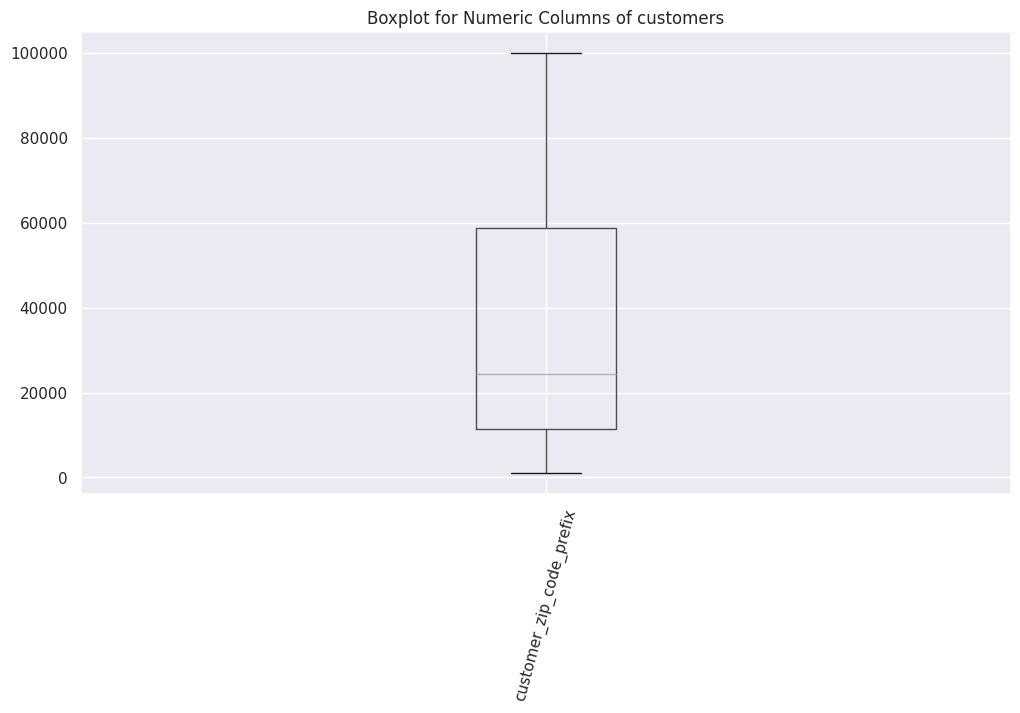

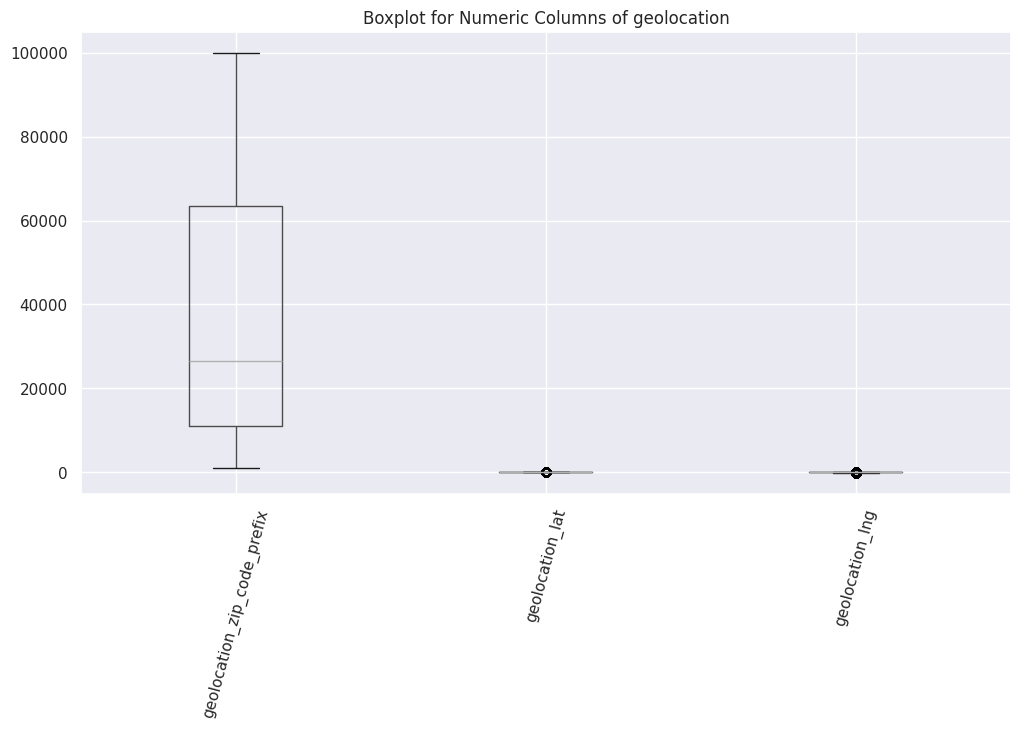

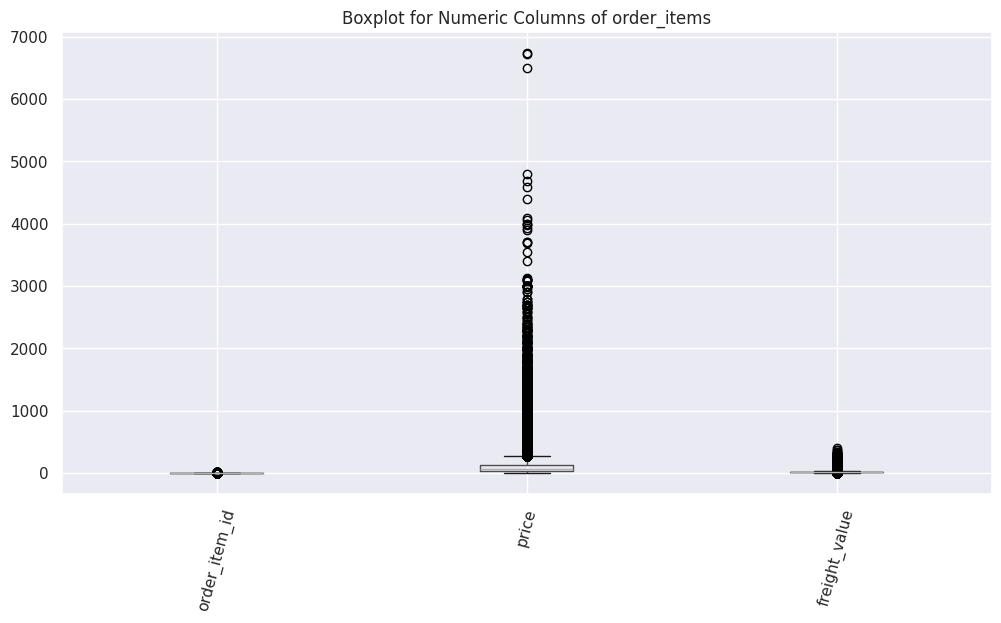

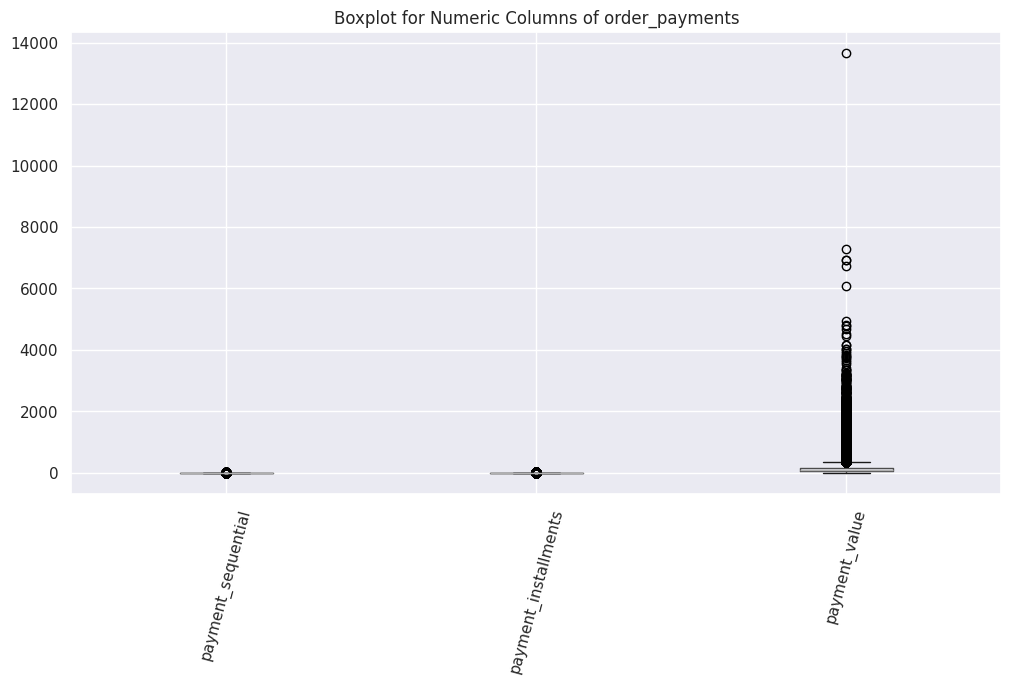

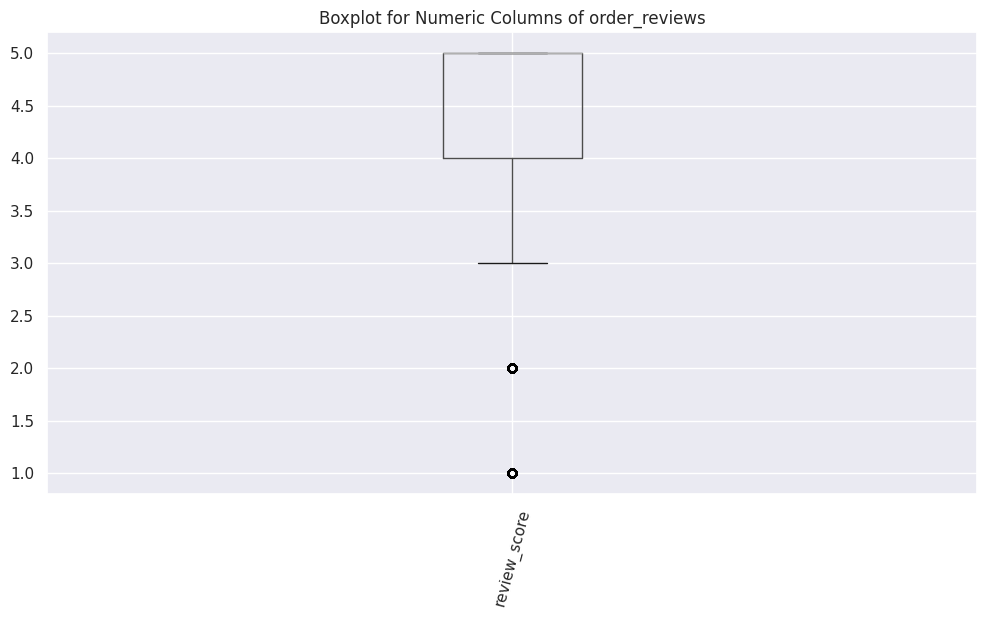


Skipping order because correlation matrix is empty or no numeric data.


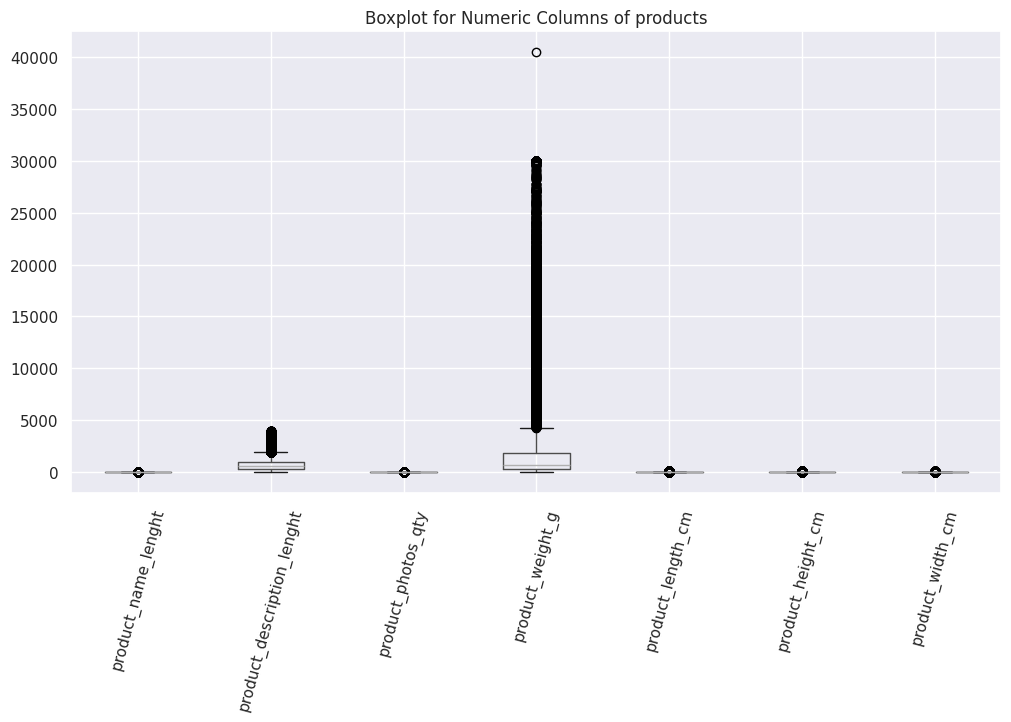

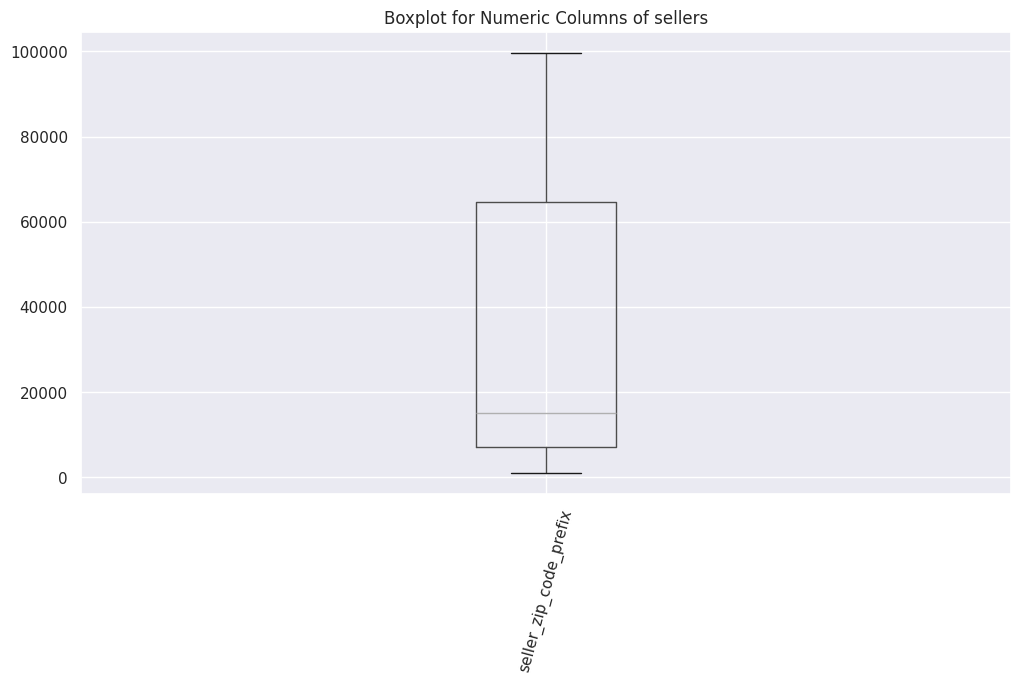

In [8]:
dfs = {
    "customers": customers,
    "geolocation": geolocation,
    "order_items": orders_items,
    "order_payments": order_payments,
    "order_reviews": order_reviews,
    "order": order,
    "products": products,
    "sellers": sellers
}

for name, df in dfs.items():
    numeric_df = df.select_dtypes(include=[float, int])
    corr = numeric_df.corr()

    if corr.empty:
        print(f"\nSkipping {name} because correlation matrix is empty or no numeric data.")
        continue

    # Plot boxplot for numeric columns to detect outliers
    plt.figure(figsize=(12, 6))
    numeric_df.boxplot()
    plt.title(f'Boxplot for Numeric Columns of {name}')
    plt.xticks(rotation=75)
    plt.show()


## 5.4 Duplicates Overview

In [9]:
dfs = {
    "customers": customers,
    "geolocation": geolocation,
    "order_items": orders_items,
    "order_payments": order_payments,
    "order_reviews": order_reviews,
    "order": order,
    "products": products,
    "sellers": sellers
}

for name, df in dfs.items():
    print(f"\nDuplicate rows for {name}:")
    duplicates = df[df.duplicated()]
    if duplicates.empty:
        print("No duplicate rows found.")
    else:
        print(duplicates)



Duplicate rows for customers:
No duplicate rows found.

Duplicate rows for geolocation:
         geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
15                              1046       -23.546081       -46.644820   
44                              1046       -23.546081       -46.644820   
65                              1046       -23.546081       -46.644820   
66                              1009       -23.546935       -46.636588   
67                              1046       -23.546081       -46.644820   
...                              ...              ...              ...   
1000153                        99970       -28.343273       -51.873734   
1000154                        99950       -28.070493       -52.011342   
1000159                        99900       -27.877125       -52.224882   
1000160                        99950       -28.071855       -52.014716   
1000162                        99950       -28.070104       -52.018658   

        geolocation_ci

## 5.4.1 Handling Duplicates

- No duplicate records were identified in the majority of the tables, indicating consistent and well-structured data across most datasets.

- The geolocation table contains duplicate entries; however, these will be evaluated later during the SQL analysis to determine whether they represent legitimate repeated locations or redundant data.

- Therefore, no duplicate removal has been applied at this stage, ensuring that no potentially relevant information is discarded prematurely.

## 5.5 Handling Missing values

### Strategy:
- Datetime columns: Missing timestamps are preserved because they often carry operational meaning (e.g., cancellations, unprocessed orders). Imputing or replace them may cause biased and unreal results

- Categorical columns: Missing values are replaced with "Unknown" to maintain categorical integrity and avoid incorrect assumptions.

- Numeric columns: Rare missing values are imputed with the median; if missingness is widespread and the column is not essential, the feature may be removed.

- High-missingness irrelevant columns: Columns containing a high proportion of missing data and not neccesary to the analysis will be dropped



## 5.5.1 Drop unnecesary columns
- Columns that won't be neccesary for the analysis and contain a high propotion of missing data


In [14]:
order_reviews = order_reviews.drop(
    columns=[
        'review_comment_title',
        'review_comment_message',
        'review_creation_date',
        'review_answer_timestamp'
    ]
)
products = products.drop(
    columns=[
        'product_name_lenght',
        'product_description_lenght',
        'product_photos_qty'
    ]
)

## 5.5.2 Replace missing values
- Missing values are replaced by 0 in products measures


In [18]:
products['product_weight_g'] = products['product_weight_g'].fillna(0)
products['product_length_cm'] = products['product_length_cm'].fillna(0)
products['product_height_cm'] = products['product_height_cm'].fillna(0)
products['product_width_cm'] = products['product_width_cm'].fillna(0)

## 5.5.3 Replace or imput numeric missing values
After reviewing all datasets, no numeric columns contain missing values across any of the tables. This indicates that:

- All numeric attributes are fully populated

- No median imputation is required

- No numeric features need to be removed due to sparsity

## 5.5.4 Replace outliers with avg values

- The boxplot analysis shows no presence of significant outliers across the numeric variables.

- All detected values fall within expected and reasonable ranges for the dataset.

- Although some variables contain large numerical values, a closer inspection shows that these values are consistent with the nature of the dataset and represent realistic business scenarios

- Because of this, no outlier treatment is required

## 5.5.5 Cleaning missings datetime values

- Datetime features often carry important chronological patterns that are crucial for understanding customer behavior, delivery timelines, and order processing.

- Imputing missing dates (e.g., filling with mean, median, or artificial timestamps) can introduce bias and create unreal or misleading sequences in the data.

- For this reason, no imputation or replacement is applied to datetime columns.

- Missing datetime values are kept as they are to preserve analytical integrity and avoid distorting time-based trends.


# 6. Correlations
- The goal of this step is to identify the relationships between the variables within the dataset.

- Understanding these correlations helps guide a more targeted and meaningful analysis, revealing how different features interact and potentially influence one another.

- A correlation heatmap will be used to visually examine these relationships, allowing for a clearer interpretation of both the strength and direction of the associations.

In [21]:
dfs = {
    "customers": customers,
    "geolocation": geolocation,
    "order_items": orders_items,
    "order_payments": order_payments,
    "order_reviews": order_reviews,
    "order": order,
    "products": products,
    "sellers": sellers
}


for name, df in dfs.items():
    numeric_df = df.select_dtypes(include=[float, int])
    print(f"\nCorrelation matrix for {name}:")
    print(numeric_df.corr())




Correlation matrix for customers:
                          customer_zip_code_prefix
customer_zip_code_prefix                       1.0

Correlation matrix for geolocation:
                             geolocation_zip_code_prefix  geolocation_lat  \
geolocation_zip_code_prefix                     1.000000         0.094068   
geolocation_lat                                 0.094068         1.000000   
geolocation_lng                                -0.347488         0.398946   

                             geolocation_lng  
geolocation_zip_code_prefix        -0.347488  
geolocation_lat                     0.398946  
geolocation_lng                     1.000000  

Correlation matrix for order_items:
               order_item_id     price  freight_value
order_item_id       1.000000 -0.060522      -0.029380
price              -0.060522  1.000000       0.414204
freight_value      -0.029380  0.414204       1.000000

Correlation matrix for order_payments:
                      payment_sequen

# 6.1 Heatmap




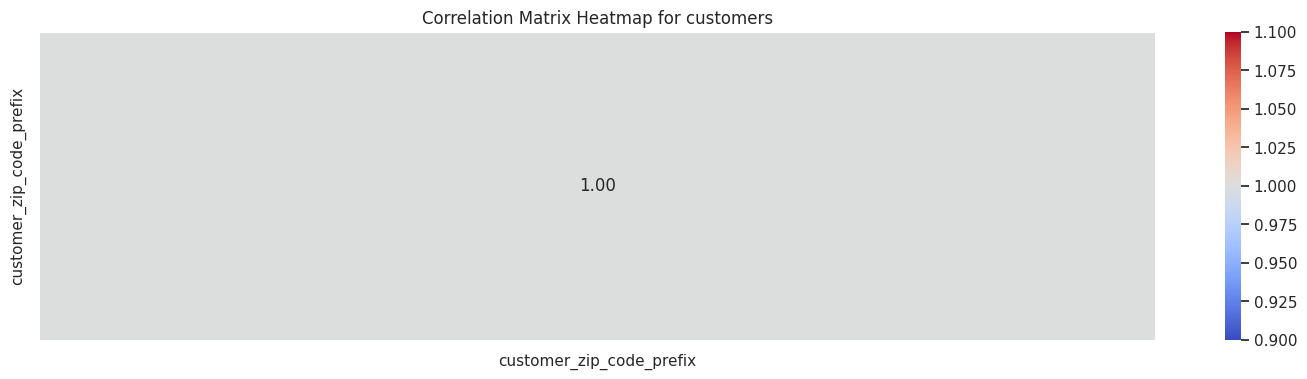

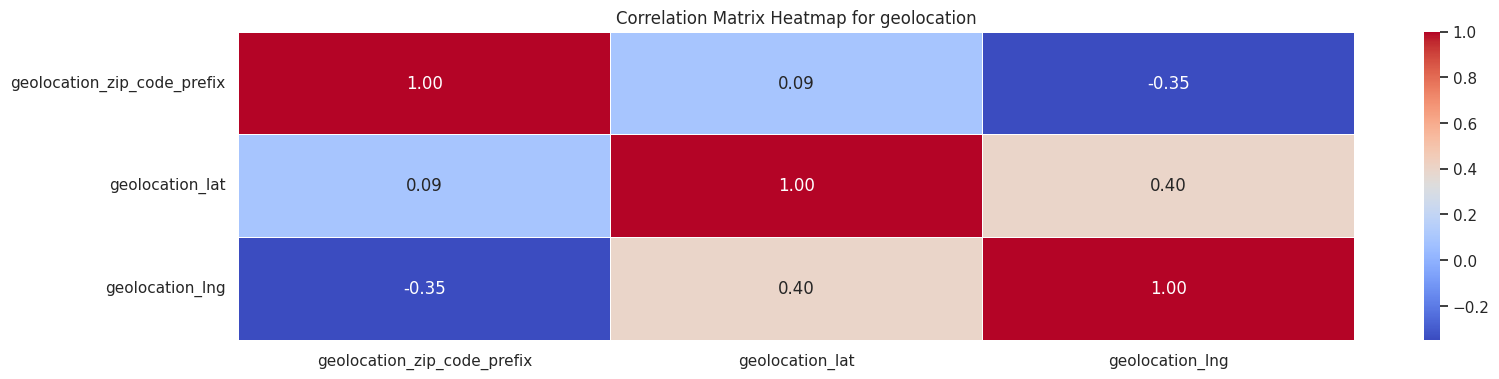

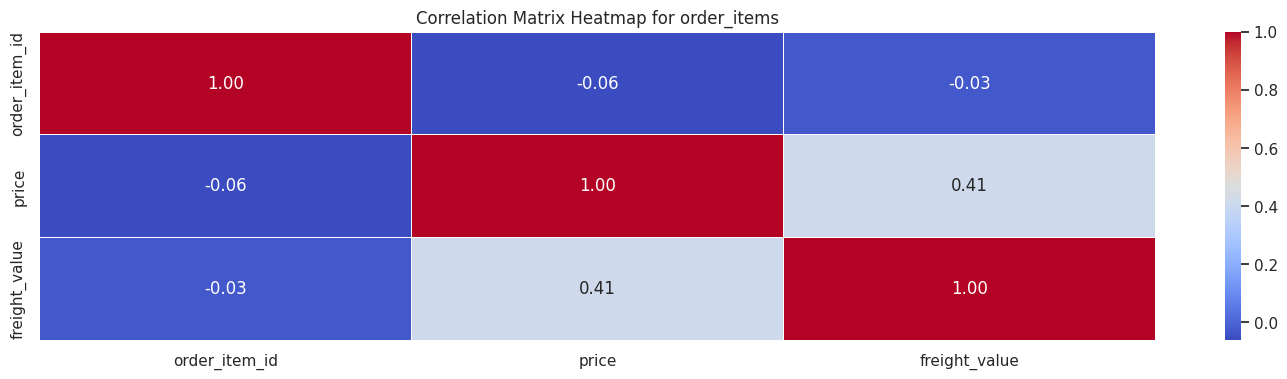

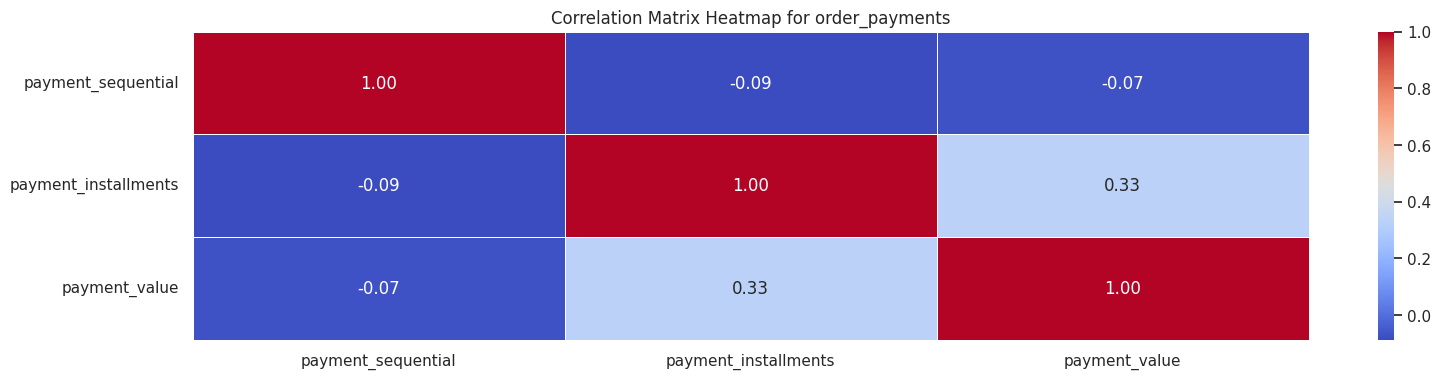

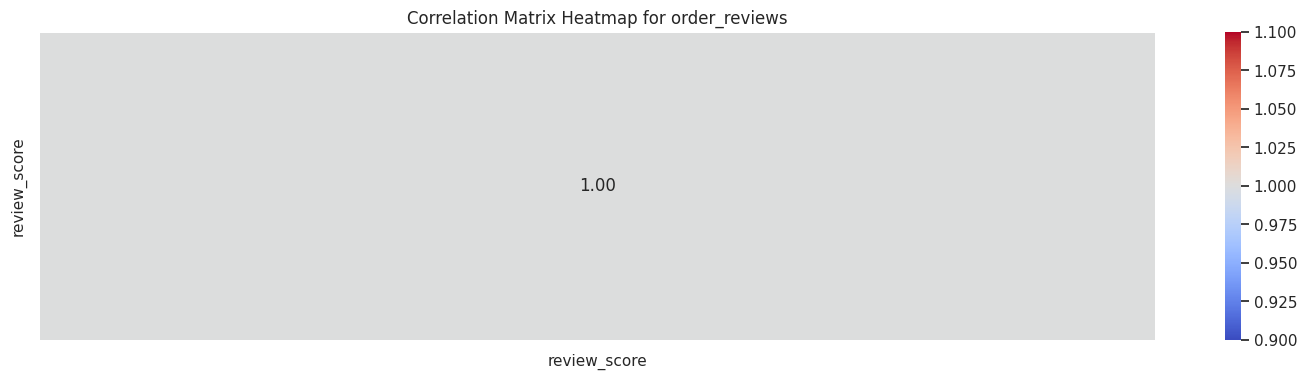


Skipping order because correlation matrix is empty or no numeric data.


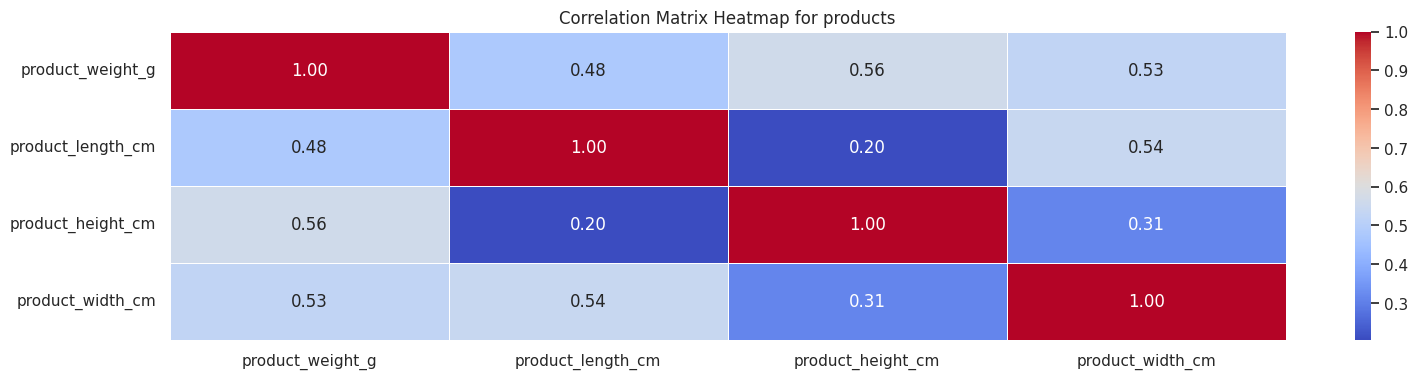

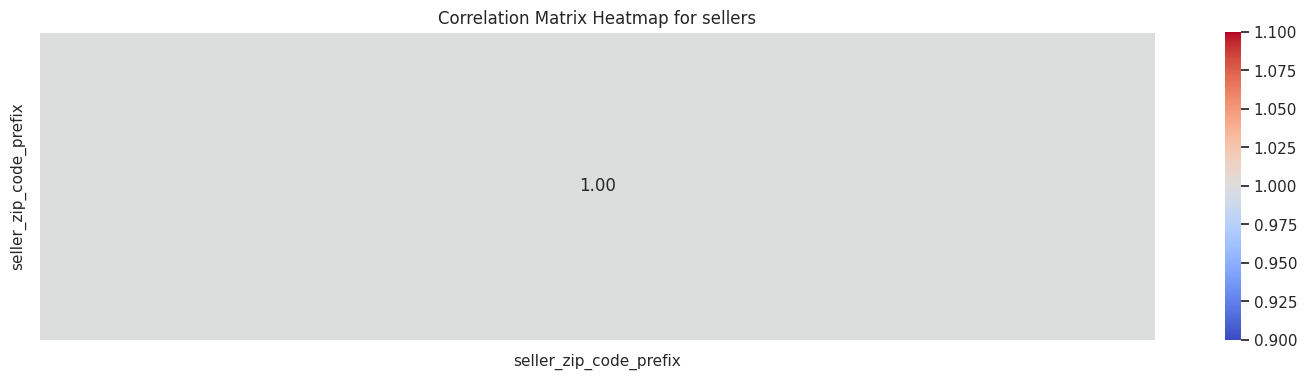

In [22]:
for name, df in dfs.items():
    numeric_df = df.select_dtypes(include=[float, int])
    corr = numeric_df.corr()

    if corr.empty:
        print(f"\nSkipping {name} because correlation matrix is empty or no numeric data.")
        continue

    plt.figure(figsize=(18,4))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
    plt.title(f'Correlation Matrix Heatmap for {name}')
    plt.show()



## 6.2 Heatmap Insights

Overall, the dataset does not exhibit strong linear relationships among most variables, suggesting that the features operate largely independently and no single variable overwhelmingly drives another.

A few moderate correlations are observed, which align with expected business logic:

- Order value and freight value show moderate relationships.
This makes sense: larger orders tend to weigh more or require more volume, which can increase freight costs and total order value.

- Payments installments is moderately correlated with payment_value, indicating that higher payment value number of installments tends to be higher as well.

- Product height and width correlate with product weight (grams), which is consistent with basic physical and volumetric characteristics of merchandise.

These correlations, while not strong, provide useful signals that validate the internal consistency of the dataset and highlight logical patterns in customer orders, product attributes, and orders payments details.


# 7. Summary


- Data Quality: The datasets overall exhibit good quality with manageable missing data and minimal duplicates.

- Missing Data: While some missing values exist, particularly in datetime fields, these were preserved intentionally to avoid introducing bias through imputation or deletion, The majority of datetime nulls are likely because of order_status, further in sql analysis it'll be analyzed.

- Categorical missing values, where appropriate, were replaced with 0 to maintain dataset integrity.

- Outliers: Exploratory visualizations such as boxplots revealed no significant outliers that could potentially distort analyses or modeling outcomes, indicating the dataset's consistency.

- Duplicates: A thorough check showed few duplicate records in one dataset; these will be considered later in sql advanced analysis

- Correlations: Correlation heatmaps highlighted moderate relationships among numeric variables, offering insights for further analysis.

- Data Cleaning: Irrelevant or redundant columns with high missing rates or little analytical value were dropped.

- Next Steps: The cleaned datasets are ready for advanced analysis, Tableau dashboards and reporting.
This thorough cleaning and exploration forms a robust foundation for reliable and effective data-driven decision-making.

# 8 Export data to csv

In [23]:
geolocation.to_csv('geolocation.csv', index=False)
order_payments.to_csv('order_payments.csv', index=False)
products.to_csv('products.csv', index=False)
order.to_csv('orders.csv', index=False)
orders_items.to_csv('order_items.csv', index=False)
customers.to_csv('customers.csv', index=False)
sellers.to_csv('sellers.csv', index=False)
order_reviews.to_csv('order_reviews.csv', index=False)


In [24]:
from google.colab import files

files.download('geolocation.csv')
files.download('order_payments.csv')
files.download('products.csv')
files.download('orders.csv')
files.download('order_items.csv')
files.download('customers.csv')
files.download('sellers.csv')
files.download('order_reviews.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>